In [109]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [110]:
#Loading Dataset
dataset=pd.read_csv('train_users_2.csv',na_values=["-unknown-","NaN","","NA"])

In [111]:
dataset.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [112]:
dataset['age'].unique()

array([      nan, 3.800e+01, 5.600e+01, 4.200e+01, 4.100e+01, 4.600e+01,
       4.700e+01, 5.000e+01, 3.600e+01, 3.700e+01, 3.300e+01, 3.100e+01,
       2.900e+01, 3.000e+01, 4.000e+01, 2.600e+01, 3.200e+01, 3.500e+01,
       5.900e+01, 4.900e+01, 4.400e+01, 3.400e+01, 2.800e+01, 1.900e+01,
       5.300e+01, 5.200e+01, 3.900e+01, 5.700e+01, 2.500e+01, 5.400e+01,
       6.900e+01, 6.300e+01, 4.300e+01, 5.500e+01, 6.500e+01, 5.800e+01,
       6.100e+01, 1.800e+01, 5.000e+00, 2.700e+01, 4.500e+01, 6.000e+01,
       4.800e+01, 5.100e+01, 6.400e+01, 7.200e+01, 7.000e+01, 6.700e+01,
       7.300e+01, 2.014e+03, 1.040e+02, 6.600e+01, 1.050e+02, 6.800e+01,
       9.500e+01, 2.400e+01, 9.400e+01, 7.500e+01, 7.900e+01, 6.200e+01,
       2.013e+03, 1.600e+01, 4.000e+00, 2.300e+01, 1.010e+02, 9.800e+01,
       7.600e+01, 7.400e+01, 8.700e+01, 9.200e+01, 1.150e+02, 7.100e+01,
       8.400e+01, 1.070e+02, 7.800e+01, 9.900e+01, 1.100e+02, 1.020e+02,
       8.200e+01, 7.700e+01, 2.200e+01, 8.900e+01, 

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [114]:
dataset=dataset.drop(['id'],axis=1)

In [115]:
dataset.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [116]:
dataset.isnull().sum().sort_values(ascending=False).head(20)

date_first_booking         124543
gender                      95688
age                         87990
first_browser               27266
first_affiliate_tracked      6065
country_destination             0
first_device_type               0
signup_app                      0
affiliate_provider              0
affiliate_channel               0
language                        0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
date_account_created            0
dtype: int64

In [117]:
dataset.shape

(213451, 15)

In [118]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = ((dataset.isnull().sum()/213451)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date_first_booking,124543,58.347349
gender,95688,44.829024
age,87990,41.222576
first_browser,27266,12.773892
first_affiliate_tracked,6065,2.841402
country_destination,0,0.000000
first_device_type,0,0.000000
signup_app,0,0.000000
affiliate_provider,0,0.000000
affiliate_channel,0,0.000000


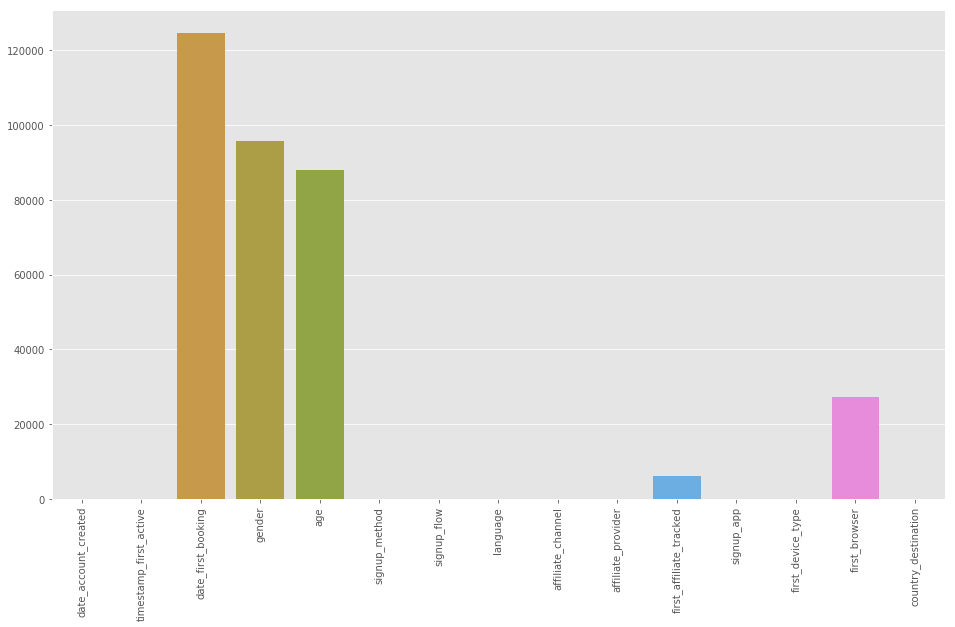

In [119]:
#Visualizing the missing Values
plot=sns.barplot(x=dataset.columns.values,y=dataset.isnull().sum())
plt.xticks(rotation=90)
plt.show()


In [120]:
dataset=dataset.drop(['date_first_booking'],axis=1)

In [121]:
dataset.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [122]:
dataset.shape

(213451, 14)

In [123]:
dataset['gender'].fillna(np.random.choice(['FEMALE','MALE']),inplace=True)
dataset.head(20)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,FEMALE,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,20100101215619,FEMALE,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,2010-01-02,20100102012558,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,2010-01-03,20100103191905,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,2010-01-04,20100104004211,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,2010-01-04,20100104023758,FEMALE,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [124]:
dataset['gender'].value_counts()

FEMALE    158729
MALE       54440
OTHER        282
Name: gender, dtype: int64

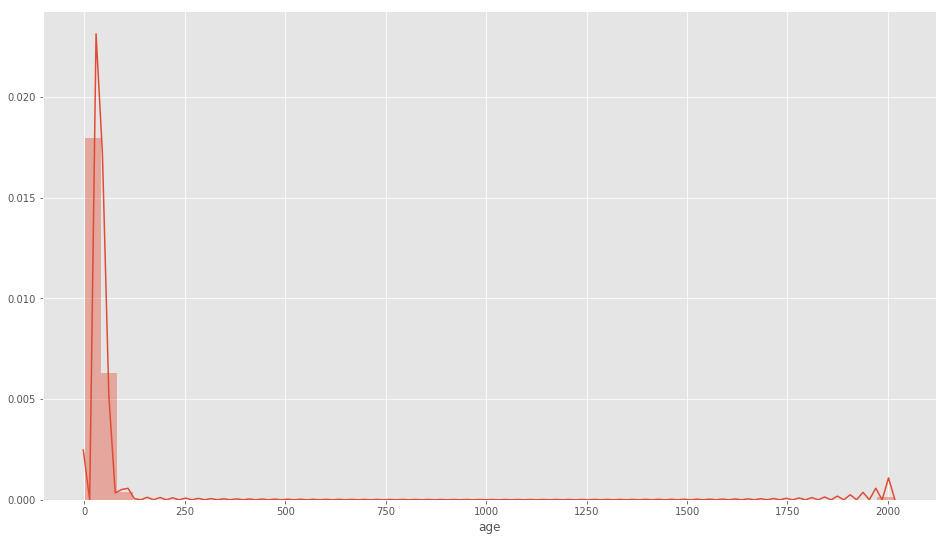

In [125]:
sns.distplot(dataset.age.dropna())

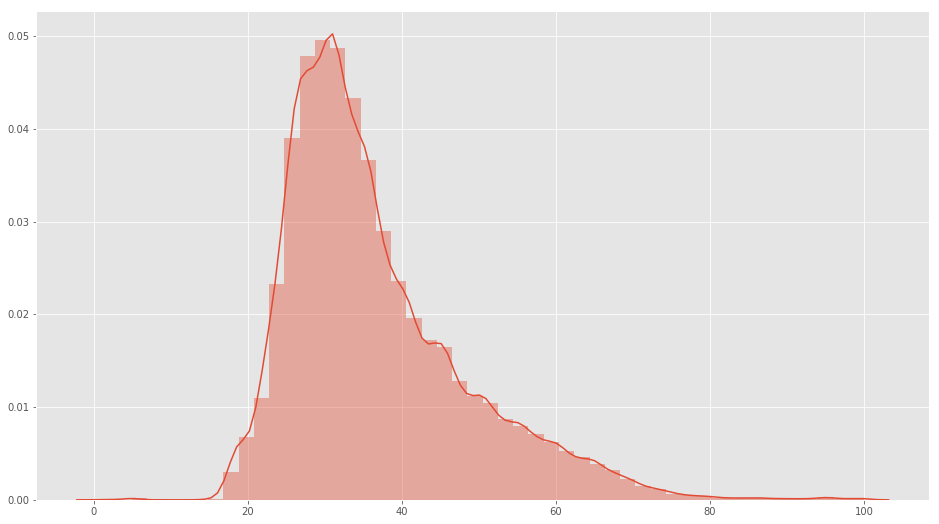

In [126]:
x=[]
for col in dataset['age'].dropna():
    if(col>0 and col<=100):
        x.append(col)
sns.distplot(x)        
plt.show()

In [127]:
col_values=dataset['age'].values
dataset['age']=np.where(np.logical_or(col_values>80,col_values<18),np.NaN,col_values)

In [128]:
#df['age'].df['age'].apply(lambda X:np.nan if(X>80 or X<18) else X)

In [129]:
dataset['age'].describe()

count    122532.000000
mean         36.389890
std          11.262599
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          80.000000
Name: age, dtype: float64

In [130]:
dataset.shape

(213451, 14)

In [131]:

dataset['age'].values

array([nan, 38., 56., ..., 32., nan, nan])

In [132]:
dataset.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,122532.000000,213451.000000
mean,2.013085e+13,36.389890,3.267387
std,9.253717e+09,11.262599,7.637707
min,2.009032e+13,18.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,33.000000,0.000000
75%,2.014031e+13,42.000000,0.000000
max,2.014063e+13,80.000000,25.000000


In [133]:
dataset['age'].unique()

array([nan, 38., 56., 42., 41., 46., 47., 50., 36., 37., 33., 31., 29.,
       30., 40., 26., 32., 35., 59., 49., 44., 34., 28., 19., 53., 52.,
       39., 57., 25., 54., 69., 63., 43., 55., 65., 58., 61., 18., 27.,
       45., 60., 48., 51., 64., 72., 70., 67., 73., 66., 68., 24., 75.,
       79., 62., 23., 76., 74., 71., 78., 77., 22., 21., 20., 80.])

In [134]:
dataset['age']=dataset['age'].fillna(np.mean(dataset['age']))

In [135]:
dataset['age'].unique()

array([36.38988999, 38.        , 56.        , 42.        , 41.        ,
       46.        , 47.        , 50.        , 36.        , 37.        ,
       33.        , 31.        , 29.        , 30.        , 40.        ,
       26.        , 32.        , 35.        , 59.        , 49.        ,
       44.        , 34.        , 28.        , 19.        , 53.        ,
       52.        , 39.        , 57.        , 25.        , 54.        ,
       69.        , 63.        , 43.        , 55.        , 65.        ,
       58.        , 61.        , 18.        , 27.        , 45.        ,
       60.        , 48.        , 51.        , 64.        , 72.        ,
       70.        , 67.        , 73.        , 66.        , 68.        ,
       24.        , 75.        , 79.        , 62.        , 23.        ,
       76.        , 74.        , 71.        , 78.        , 77.        ,
       22.        , 21.        , 20.        , 80.        ])

In [136]:
dataset.head(20)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,FEMALE,36.38989,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,FEMALE,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,20100101215619,FEMALE,36.38989,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,2010-01-02,20100102012558,FEMALE,46.00000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,2010-01-03,20100103191905,FEMALE,47.00000,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,2010-01-04,20100104004211,FEMALE,50.00000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,2010-01-04,20100104023758,FEMALE,46.00000,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [137]:
dataset['age'].describe()

count    213451.000000
mean         36.389890
std           8.533231
min          18.000000
25%          32.000000
50%          36.389890
75%          36.389890
max          80.000000
Name: age, dtype: float64

In [138]:
dataset['first_browser'].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', nan, 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

In [139]:
dataset['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
Yandex.Browser             11
CometBird                  11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Flock                       2
OmniWeb   

In [140]:
dataset['first_browser']=dataset['first_browser'].fillna('Chrome')

In [141]:
dataset['first_browser'].value_counts()

Chrome                  91111
Safari                  45169
Firefox                 33655
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
Yandex.Browser             11
CometBird                  11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Flock                       2
OmniWeb   

In [142]:
dataset['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [143]:
dataset['first_affiliate_tracked'].fillna('untracked',inplace=True)

In [144]:
dataset['first_affiliate_tracked'].unique()

array(['untracked', 'omg', 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [145]:
dataset.head(20)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,FEMALE,36.38989,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,FEMALE,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,20100101215619,FEMALE,36.38989,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,2010-01-02,20100102012558,FEMALE,46.00000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,2010-01-03,20100103191905,FEMALE,47.00000,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,2010-01-04,20100104004211,FEMALE,50.00000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,2010-01-04,20100104023758,FEMALE,46.00000,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [146]:
dataset['date_account_created'].describe()

count         213451
unique          1634
top       2014-05-13
freq             674
Name: date_account_created, dtype: object

In [147]:
dataset['timestamp_first_active'].describe()

count    2.134510e+05
mean     2.013085e+13
std      9.253717e+09
min      2.009032e+13
25%      2.012123e+13
50%      2.013091e+13
75%      2.014031e+13
max      2.014063e+13
Name: timestamp_first_active, dtype: float64

In [148]:
dataset['date_account_created']=pd.to_datetime(dataset['date_account_created'],format='%Y-%m-%d')

In [149]:
dataset['date_account_created'].describe()

count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object

In [150]:
dataset['day_account_created']=dataset['date_account_created'].dt.weekday

In [151]:
dataset['year_account_created']=dataset['date_account_created'].dt.year

In [152]:
dataset['quarter_account_created']=dataset['date_account_created'].dt.quarter

In [153]:
dataset['month_account_created']=dataset['date_account_created'].dt.month

In [154]:
dataset=dataset.drop('date_account_created',axis=1)

In [155]:
dataset.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,day_account_created,year_account_created,quarter_account_created,month_account_created
0,20090319043255,FEMALE,36.38989,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,2010,2,6
1,20090523174809,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2,2011,2,5
2,20090609231247,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1,2010,3,9
3,20091031060129,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,2011,4,12
4,20091208061105,FEMALE,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,2010,3,9


In [156]:
dataset['timestamp_first_active']=pd.to_datetime(dataset['timestamp_first_active'],format='%Y%m%d%H%M%S')

In [157]:
dataset['hour_first_active']=dataset['timestamp_first_active'].dt.hour
dataset['min_first_active']=dataset['timestamp_first_active'].dt.minute
dataset['second_first_active']=dataset['timestamp_first_active'].dt.second
dataset['date_first_active']=dataset['timestamp_first_active'].dt.date
dataset['month_first_active']=dataset['timestamp_first_active'].dt.month
dataset['year_first_active']=dataset['timestamp_first_active'].dt.year

In [158]:
dataset.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,day_account_created,year_account_created,quarter_account_created,month_account_created,hour_first_active,min_first_active,second_first_active,date_first_active,month_first_active,year_first_active
0,2009-03-19 04:32:55,FEMALE,36.38989,facebook,0,en,direct,direct,untracked,Web,...,0,2010,2,6,4,32,55,2009-03-19,3,2009
1,2009-05-23 17:48:09,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,...,2,2011,2,5,17,48,9,2009-05-23,5,2009
2,2009-06-09 23:12:47,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,...,1,2010,3,9,23,12,47,2009-06-09,6,2009
3,2009-10-31 06:01:29,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,...,0,2011,4,12,6,1,29,2009-10-31,10,2009
4,2009-12-08 06:11:05,FEMALE,41.00000,basic,0,en,direct,direct,untracked,Web,...,1,2010,3,9,6,11,5,2009-12-08,12,2009


In [159]:
dataset=dataset.drop('timestamp_first_active',axis=1)

In [160]:
dataset.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_account_created,year_account_created,quarter_account_created,month_account_created,hour_first_active,min_first_active,second_first_active,date_first_active,month_first_active,year_first_active
0,FEMALE,36.38989,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,2010,2,6,4,32,55,2009-03-19,3,2009
1,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,2,2011,2,5,17,48,9,2009-05-23,5,2009
2,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,1,2010,3,9,23,12,47,2009-06-09,6,2009
3,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,2011,4,12,6,1,29,2009-10-31,10,2009
4,FEMALE,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,2010,3,9,6,11,5,2009-12-08,12,2009


In [161]:
for col in dataset:
    if(dataset[col].dtype=='object'):
        le = preprocessing.LabelEncoder()
        workclass_tr=le.fit_transform(dataset[col])
        dataset[col]=workclass_tr

In [162]:
dataset.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_account_created,year_account_created,quarter_account_created,month_account_created,hour_first_active,min_first_active,second_first_active,date_first_active,month_first_active,year_first_active
0,0,36.38989,1,0,5,2,4,6,2,3,...,0,2010,2,6,4,32,55,0,3,2009
1,1,38.00000,1,0,5,7,8,6,2,3,...,2,2011,2,5,17,48,9,1,5,2009
2,0,56.00000,0,3,5,2,4,6,2,6,...,1,2010,3,9,23,12,47,2,6,2009
3,0,42.00000,1,0,5,2,4,6,2,3,...,0,2011,4,12,6,1,29,3,10,2009
4,0,41.00000,0,0,5,2,4,6,2,3,...,1,2010,3,9,6,11,5,4,12,2009


In [163]:
dataset['country_destination'].unique()

array([ 7, 10, 11,  4,  1,  5,  3,  6,  9,  8,  2,  0], dtype=int64)

In [164]:
dataset['country_destination'].describe()

count    213451.000000
mean          7.840971
std           1.900826
min           0.000000
25%           7.000000
50%           7.000000
75%          10.000000
max          11.000000
Name: country_destination, dtype: float64

In [165]:
array = dataset.values
X = dataset.drop('country_destination',axis=1)
Y = dataset['country_destination']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [203]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))

In [230]:
results=[]
names=[]
for name,clf in models:
    Kfold=model_selection.KFold(n_splits=2,random_state=7)
    cv_results=model_selection.cross_val_score(clf,X_train,Y_train,cv=Kfold)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100,cv_results.std(),'\n')

LR 58.49496369173109 0.002892949168423531 

KNN 54.71714687280394 0.0009194190676973246 

DT 48.29234012649333 0.001510892480674625 

RF 59.540290466151326 0.0007554462403372986 

XGB 63.373155305692194 0.0006324666198173068 



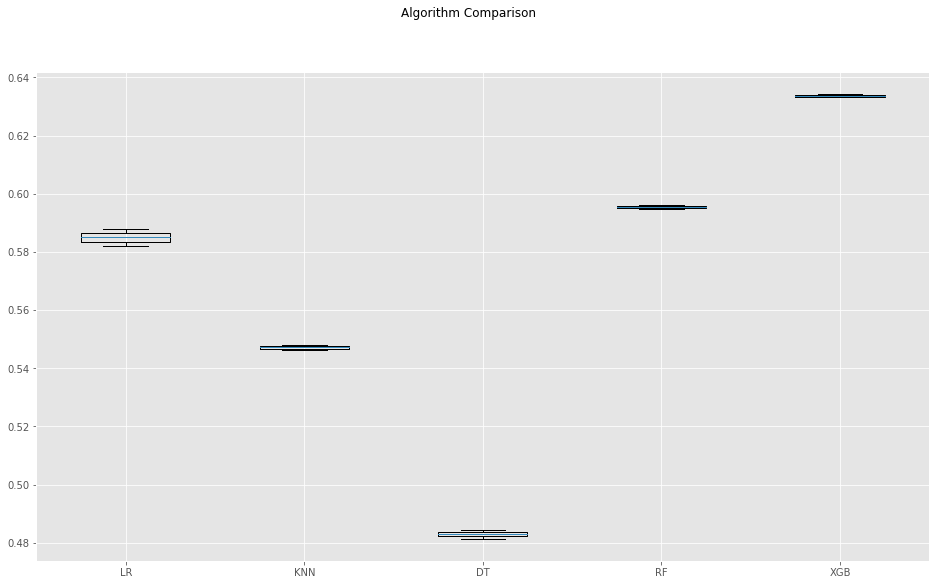

In [288]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
K=fig.add_subplot(111)
plt.boxplot(results, labels=names)
plt.show()